In [1]:
import numpy as np # linear
import pandas as pd # data processing, CSV file I/O 
import shutil
import nltk 
import gensim
import torch
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
k=0

In [3]:
from keras.utils import pad_sequences

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


import spacy
import numpy as np

import random
import math
import time

In [5]:
import warnings
import numpy as np 
import pandas as pd 

import os
import torch
import torch.nn as nn 
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [6]:
warnings.filterwarnings('ignore')
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from   torchtext.vocab import FastText
import nltk
from nltk import ngrams
from nltk.stem import WordNetLemmatizer as wnl
import torchtext.vocab as vocab
import fasttext
from torch.utils.data import Dataset ,DataLoader


In [7]:
import nltk
import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
!pip install pytorch-nlp 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 5.8 MB/s eta 0:00:00


In [9]:
import datasets
from datasets import load_dataset

In [10]:
french_stopwords = nltk.corpus.stopwords.words('french')
english_stopwords = nltk.corpus.stopwords.words('english')
chinese_stopwords = nltk.corpus.stopwords.words('chinese')

In [11]:
import re
def clean_text(txt):
        txt = txt.lower()
        txt = re.sub(r"i'm", "i am", txt)
        txt = re.sub(r"he's", "he is", txt)
        txt = re.sub(r"she's", "she is", txt)
        txt = re.sub(r"that's", "that is", txt)
        txt = re.sub(r"what's", "what is", txt)
        txt = re.sub(r"where's", "where is", txt)
        txt = re.sub(r"\'ll", " will", txt)
        txt = re.sub(r"\'ve", " have", txt)
        txt = re.sub(r"\'re", " are", txt)
        txt = re.sub(r"\'d", " would", txt)
        txt = re.sub(r"won't", "will not", txt)
        txt = re.sub(r"can't", "can not", txt)
        txt = re.sub(r"[^\w\s]", "", txt)
        return txt
def preprocess (x):
    global vocab 
    x=clean_text(x)
    x=''.join([i   for i in x if not i in string.punctuation])
    x=nltk.word_tokenize(x.lower(), language='english')
    x=[i if not i.isdigit() else 'num'for i in x ]
    x=['<s>']+list(x)+[r'<\s>']
    #x=[i  for i in x if not i in english_stopwords]
  
    x=pad_sequences([x],maxlen=25,value='<pad>', padding='post',dtype=object)[0]
    return list(x)

In [12]:
data=pd.read_csv("/kaggle/input/cleaned-data-for-the-chatbot-collected-from-movies/dialogs_expanded.csv")

In [13]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
data.iloc[:,0]=data.iloc[:,0].apply(lambda x:preprocess(x) )
data.iloc[:,1]=data.iloc[:,1].apply(lambda x:preprocess(x) )

In [15]:
import torchtext.vocab as vocab


In [16]:
vocab_en=vocab.build_vocab_from_iterator(data.iloc[:,0]+data.iloc[:,1], specials=['<unk>', '<pad>','<s>','<\s>'])
vocab_fr=vocab.build_vocab_from_iterator(data.iloc[:,0]+data.iloc[:,1], specials=['<unk>', '<pad>','<s>','<\s>'])
vocab_cn=vocab.build_vocab_from_iterator(data.iloc[:,0]+data.iloc[:,1], specials=['<unk>', '<pad>','<s>','<\s>'])


In [17]:
v_en=vocab_en.get_stoi()


In [18]:
def change(x):
    x=[v_en[i] for i in x]
    return x

In [19]:
data.iloc[:,0]=data.iloc[:,0].apply(lambda x:change(x) )
data.iloc[:,1]=data.iloc[:,1].apply(lambda x:change(x) )


In [20]:
class dataset(Dataset):
    def __init__(self,x,y):
         self.x=x
         self.y=y
    def __len__(self):
        return len(self.x) 
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [21]:
x=torch.tensor(data.iloc[:,0].tolist())
y=torch.tensor(data.iloc[:,1].tolist())

In [22]:
train=dataset(x[:100000],y[:100000])
valid=dataset(x[125000:],y[125000:])
train_set=DataLoader(train,batch_size=32,shuffle =True)
valid_set=DataLoader(valid,batch_size=32,shuffle =True)

In [23]:
class encode(nn.Module):
    def __init__(self):
        super(encode,self).__init__()
        self.emb=nn.Embedding(len(v_en),300)
        self.lstm=nn.GRU(300,1024,bidirectional=True,batch_first=True,dropout=.3)
        self.linear_h=nn.Linear(2048,1028)
    def forward(self,x):
        x=self.emb(x).cuda()
        x,h=self.lstm(x)  
        #h=torch.cat((h[1].cuda(),h[0].cuda() ),dim=1)
        return x.cuda(),h.cuda()    
    
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_size):
        super(BahdanauAttention, self).__init__()
        self.Wa = nn.Linear(hidden_size, hidden_size)
        self.Ua = nn.Linear(hidden_size, hidden_size)
        self.Va = nn.Linear(hidden_size, 1)

    def forward(self, query, keys):
      #  print(query.shape,keys.shape)
        scores = self.Va(torch.tanh(self.Wa(query.unsqueeze(1).repeat(1,keys.shape[1],1)) + self.Ua(keys)))
        scores = scores.squeeze(2).unsqueeze(1)
        weights = F.softmax(scores, dim=-1)
        context = torch.bmm(weights, keys)
        return context, weights
class decode (nn.Module):
     def __init__(self):
        super(decode,self).__init__()
        self.emb=nn.Embedding(len(v_en),300)
        self.lstm=nn.GRU(2348,1024,bidirectional=True,batch_first=True,dropout=.3)
        self.linear=nn.Linear(2048,len(v_en))
        self.linear2=nn.Linear(2048,1)
        self.att=BahdanauAttention(2048)
     def forward (self,x,states,h):  
                x=x.unsqueeze(1).cuda()
                x=self.emb(x).cuda() 
                h2=torch.cat((h[1].cuda(),h[0].cuda() ),dim=1)

                context,att=self.att(h2,states)
               # states=states.permute(0,2,1).cuda()
             #   print(context.shape,att.shape)
            #    att=att.permute(0,2,1).cuda() 

             #   weighted = torch.bmm(att, states).cuda()
             #   weighted = weighted.permute(1, 0, 2).cuda()
                #weighted = [1, batch size, enc hid dim * 2]
                rnn_input = torch.cat((x, context), dim = 2).cuda()
                x1,h1=self.lstm(rnn_input,h.cuda())
                x1= self.linear(x1.cuda()).cuda()
                x1=x1.squeeze(1).cuda()

                return x1.cuda(),h1
            

In [24]:
class seq2seq (nn.Module):
    def __init__(self):
        super(seq2seq,self).__init__()
        self.decode=decode().cuda()
        self.encode=encode().cuda()
    def forward(self,x,target,epoch):
        states,h=self.encode(x)
        batch=x.shape[0]      
        length=x.shape[1]
        y=target[:,0]
        ans=torch.zeros(batch,length,len(v_en)).cuda()
        for t in range(1,length):
            out,h=self.decode(y,states,h) 
            ans[:,t,:]=out
            y=  target[:,t] 
        return ans 
    def one_forward(self,x):
        states,h=self.encode(x)
        batch=x.shape[0]      
        length=x.shape[1]
        y=x[:,0]
        ans=torch.zeros(batch,length).cuda()
        for t in range(1,length):
            out,h=self.decode(y,states,h) 
            ans[:,t]=torch.argmax(out,dim=1)
            y= torch.argmax(out,dim=1)
        return ans 

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [26]:
model =seq2seq().cuda()
loss=nn.CrossEntropyLoss(ignore_index=v_en['<pad>'])
optim=torch.optim.Adam(model.parameters())
schedular=torch.optim.lr_scheduler.ReduceLROnPlateau(optim,verbose=True,patience=5)

In [27]:
l_train=[]
v_train=[]
for i in range(0,20):
    model.train()
    t_l=0
    o=0
    a_t=0
    for (a,b) in train_set:
        r=model(a.cuda(),b.cuda(),i)
        r=r[1:].view(-1,r.shape[-1])
        l=loss(r,b[1:].cuda().reshape(-1))
        optim.zero_grad()
        l.backward()
        optim.step()
        t_l+=l.item()
        o+=1
#        k=calculate_accuracy(r,c.cuda())
        a_t+=k        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        print(f"\r iter {o}  train loss {l.item()} , accuracy : { k}",end='')
    v_l=0
    model.eval()
    print()
    a_v=0
    with torch.no_grad():
        for (a,b) in valid_set:
            r=model(a.cuda(),b.cuda(),i)
            r=r.view(-1,r.shape[-1])
            l=loss(r,b.cuda().reshape(-1))
            v_l+=l.item()
            a_v+=k
    schedular.step(v_l)
    l_train.append(t_l)
    v_train.append(v_l)
    if (i==10):
        torch.save(model,'model_all.pth')
        torch.save(model,'model_dict.pt')
    print(f"{i} train loss: {t_l/len(train_set) } accuracy : {a_t/len(train_set)  }  , valid : {v_l/ len(valid_set)} accuracy : {a_v / len(valid_set) }")

 iter 3125  train loss 5.208647727966309 , accuracy : 00
0 train loss: 5.608848312835693 accuracy : 0.0  , valid : 5.499241888126619 accuracy : 0.0
 iter 3125  train loss 5.120732307434082 , accuracy : 00
1 train loss: 4.832767167053222 accuracy : 0.0  , valid : 5.5837115321613995 accuracy : 0.0
 iter 3125  train loss 4.2639055252075195 , accuracy : 0
2 train loss: 3.949251925125122 accuracy : 0.0  , valid : 5.931183161598087 accuracy : 0.0
 iter 3125  train loss 3.5321033000946045 , accuracy : 0
3 train loss: 3.416846288986206 accuracy : 0.0  , valid : 6.326991441773205 accuracy : 0.0
 iter 3125  train loss 3.330930233001709 , accuracy : 00
4 train loss: 3.0176370796203615 accuracy : 0.0  , valid : 6.701257241538782 accuracy : 0.0
 iter 3125  train loss 3.140571355819702 , accuracy : 00
5 train loss: 2.7097862408447266 accuracy : 0.0  , valid : 7.1024818304108415 accuracy : 0.0
 iter 3125  train loss 2.572819232940674 , accuracy : 00
Epoch 00007: reducing learning rate of group 0 to 1

In [1]:
torch.save(model,'model_all2.pth')
torch.save(model,'model_dict2.pt')

shutil.move('model_all2.pth', '/kaggle/working/model_all2.pth')
shutil.move('model_dict2.pt', '/kaggle/working/model_dict2.pt')

NameError: name 'torch' is not defined

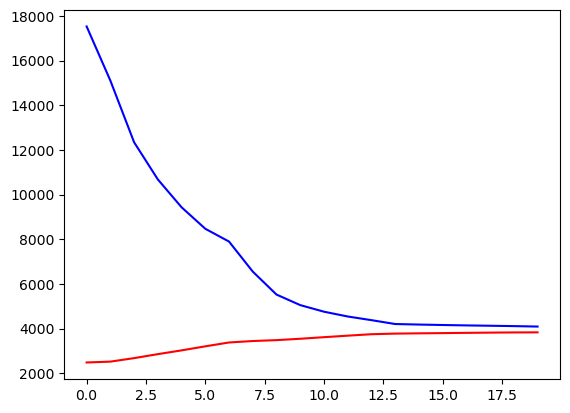

In [29]:
from matplotlib import pyplot as plt
plt.plot (list(v_train),c='r')
plt.plot (list(l_train),c='b')